# **05. 벡터의 유사도(Vector Similarity)**
문서의 유사도를 구하는 일은 자연어 처리의 주요 주제 중 하나입니다. 사람들이 인식하는 문서의 유사도는 주로 문서들 간에 동일한 단어 또는 비슷한 단어가 얼마나 공통적으로 많이 사용되었는지에 의존합니다. 

이는 기계에서도 마찬가지입니다. 

기계가 계산하는 문서의 유사도의 성능은 각 문서의 단어들을 어떤 방법으로 수치화하여 표현했는지(DTM, Word2Vec 등), 문서 간의 단어들의 차이를 어떤 방법(유클리드 거리, 코사인 유사도 등)으로 계산했는지에 달려있습니다.

# **1. 코사인 유사도(Cosine Similarity)**

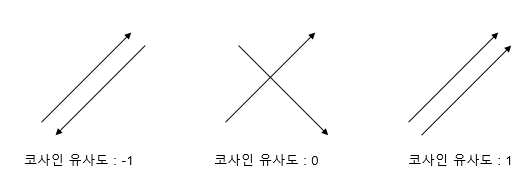

* 두 벡터 A, B에 대한 식

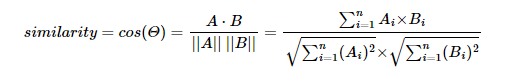

 * 값이 1에 가까울수록 유사도가 높다고 판단할 수 있습니다.

 

문서1 : 저는 사과 좋아요

문서2 : 저는 바나나 좋아요

문서3 : 저는 바나나 좋아요 저는 바나나 좋아요

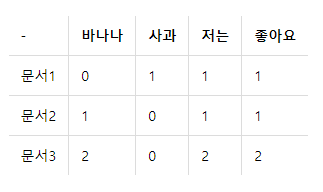

In [ ]:
from numpy import dot
from numpy.linalg import norm # 선형대수 함수
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [ ]:
# 문서 1, 2, 3에 대한 BoW
doc1=np.array([0,1,1,1])
doc2=np.array([1,0,1,1])
doc3=np.array([2,0,2,2])

In [ ]:
print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) #문서2과 문서3의 코사인 유사도

한 문서 내의 모든 단어의 빈도수가 동일하게 증가하는 경우에는 코사인 유사도의 값이 1이라는 것


**코사인 유사도를 사용하지 않는다면...?**

Ex) 문서 A, B, C, D ......

문서 A와 나머지 문서들이 거의 동일한 패턴을 가지지만, 문서 B의 길이가 가장 길다면(=단어의 빈도 수가 일정하게 더 높아진다면)
다른 문서들에 비해 유사도가 더 높게 나온다.

# **1-1. 유사도를 이용한 추천 시스템 구현하기**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

In [ ]:
# https://www.kaggle.com/rounakbanik/the-movies-dataset

data = pd.read_csv('/gdrive/My Drive/movies_metadata.csv', low_memory=False)
data.head(2)

# 제목과 줄거리를 코사인 유사도에 사용

In [ ]:
data = data.head(20000)

In [ ]:
data['overview'].isnull().sum()

In [ ]:
data['overview'] = data['overview'].fillna('')

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
# overview에 대해서 tf-idf 수행
tfidf_matrix = tfidf.fit_transform(data['overview'])
print(tfidf_matrix.shape)

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(data.index, index=data['title']).drop_duplicates()
print(indices.head())

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당되는 인덱스를 받아옵니다. 이제 선택한 영화를 가지고 연산할 수 있습니다.
    idx = indices[title]

    # 모든 영화에 대해서 해당 영화와의 유사도를 구합니다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬합니다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아옵니다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 받아옵니다.
    movie_indices = [i[0] for i in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴합니다.
    return data['title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Dark Knight Rises')

In [ ]:
get_recommendations('Toy Story')

# **2. 유클리드 거리(Euclidean distance)**

다차원 공간에서 두개의 점 p와 q가 각각 p=(p1,p2,p3,......,pn)
과 q=(q1,q2,q3,......qn)의 좌표를 가질 때 

두 점 사이의 거리를 계산하는 유클리드 거리 공식

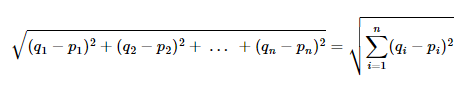

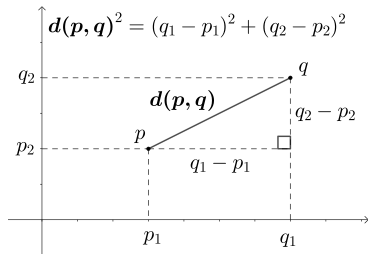

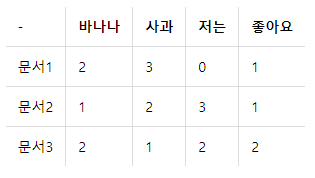
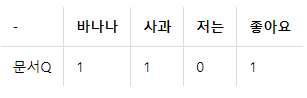

In [ ]:
import numpy as np
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print(dist(doc1,docQ))
print(dist(doc2,docQ))
print(dist(doc3,docQ))

# 거리 값이 작다는 것 = 문서간 유사도가 높다.



*   코사인 유사도는 내적공간의 두 벡터간 각도와 코사인값을 이용하여 측정된 벡터간 유사한 정도이다. 코사인 유사도는 '방향'에 대한 유사도이다. 즉, '거리'는 고려하지 않는다.

*   여기서 유클리드 거리와 코사인 유사도의 차이점이 드러난다. 거리 기반 (ex.유클리드 거리)은 좌표를 기준으로, 가까운 좌표에 있는 점들이 유사도가 높다고 측정되는 반면, 각도 기반 (ex.코사인 유사도)은 기울기와 방향이 같은 벡터가 유사도가 높다고 측정된다. 

*   코사인 유사도는 2차원보다 높은 차원의 데이터, 벡터의 크기가 중요하지 않은 데이터에 주로 사용된다. 



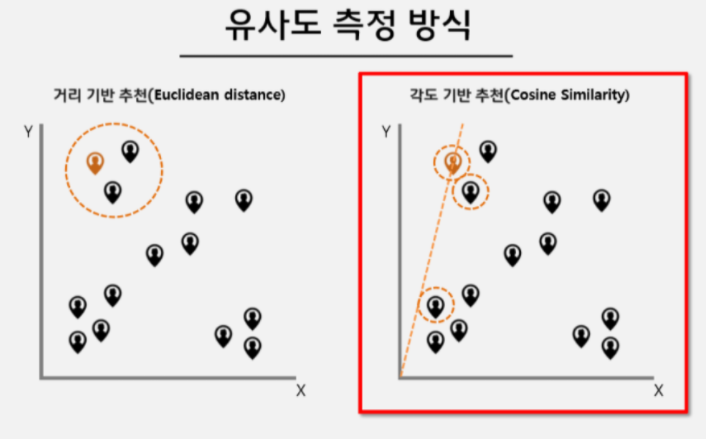



# **3. 자카드 유사도(Jaccard similarity)**

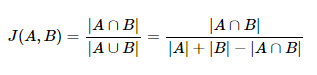

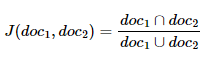

= 합집합 중 교집합의 비율

= 공통적으로 등장한 단어의 비율

In [ ]:
# 다음과 같은 두 개의 문서가 있습니다.
# 두 문서 모두에서 등장한 단어는 apple과 banana 2개.
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화를 수행합니다.
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

# 토큰화 결과 출력
print(tokenized_doc1)
print(tokenized_doc2)

In [ ]:
union = set(tokenized_doc1).union(set(tokenized_doc2)) # doc1, doc2의 합집합
print(union)

In [ ]:
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2)) # doc1, doc2의 교집합
print(intersection)

In [ ]:
print(len(intersection)/len(union)) # 2를 12로 나눔.

# **4. 레벤슈타인 거리**

*   문자열이 얼마나 비슷한 지를 나타내는 것, 편집 거리라도고 한다.

*   예를 들어, hat과 here의 편집거리 = 3

    a -> e, t -> r, e 추가

편집 거리를 최소화 하는 것이 레벤슈타인 거리




In [ ]:
def calc_distance(a,b):
    # 레벤슈타인 거리 계산
    if a==b:
        return 0 # 문자열이 동일하면 거리 = 0
    a_len=len(a)
    b_len=len(b)
    if a=="" :
        return b_len # a가 공집합인 경우 레벤슈타인 거리 = b_len
    if b=="" :
        return a_len # b가 공집합인 경우 레벤슈타인 거리 = a_len

# 2차원 표 (a_len+1, b_len+1) 준비 -> 공집합부터 비교를 하기 때문에 문자열 길이+1 크기의 표 필요
    matrix=[[] for i in range(a_len+1)]
    for i in range(a_len+1):
        matrix[i] = [0 for j in range(b_len+1)] # 0으로 초기화

    # 0일 때 초깃값을 설정, 첫번째 행, 열을 문자열 길이로 초기화
    for i in range(a_len+1) :
        matrix[i][0]=i
    for j in range(b_len+1) :
        matrix[0][j]=j
    # 표 채우기
    for i in range(1, b_len+1) :
        ac=a[i-1] # 비교할 문자 세팅
        for j in range(1, b_len+1) :
            bc=b[j-1] # 비교할 문자 세팅
            cost=0 if (ac==bc) else 1
            matrix[i][j] = min([matrix[i-1][j]+1, matrix[i][j-1]+1, matrix[i-1][j-1]+cost])
    return matrix[a_len][b_len]

print(calc_distance("가나다라", "가마바라"))


**동작 과정**

노랑 +1 : 문자 삽입

초록 + cost : 문자 변경(cost값은 비교하는 문자가 같으면 0, 아니면 1)

파랑 +1 : 문제 삭제

이 3가지 값 중에서 최솟값이 빨간 부분에 들어가는 것

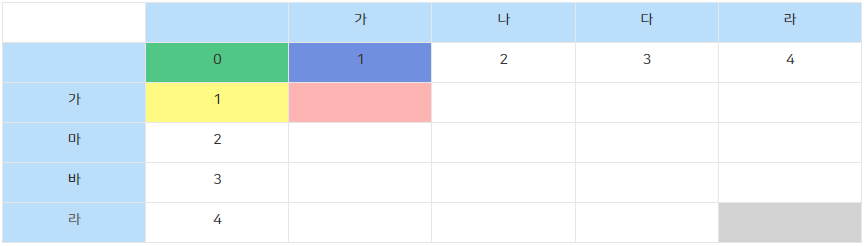

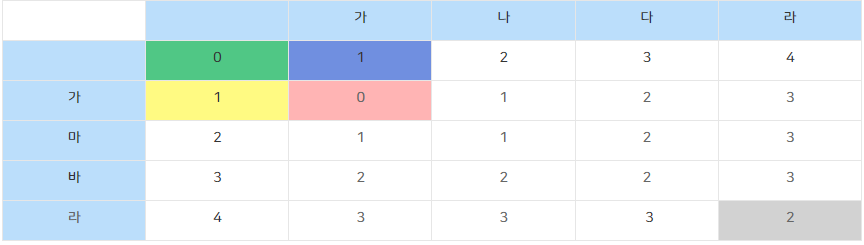



In [ ]:
samples = ["신촌역", "신천군", "신천역", "신발", "마곡역"]
base = samples[0]
r = sorted(samples, key=lambda n: calc_distance(base, n))
for n in r :
    print(calc_distance(base,n), n)

https://lovit.github.io/nlp/2018/08/28/levenshtein_hangle/
